In [1]:
import re
import nltk
import spacy
import string
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import tokenize
from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/American-Tourister-AMT-SCH-02/dp/B07CJCGM1M/ref=cm_cr_arp_d_product_top?ie=UTF8',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

In [3]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [5]:
for x in tqdm_notebook(range(1600)):
    soup = get_soup(f'https://www.amazon.in/American-Tourister-AMT-SCH-02/product-reviews/B07CJCGM1M/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=1={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/1600 [00:00<?, ?it/s]

In [6]:
df = pd.DataFrame(reviewlist)
df

Rating             Title  \
0        5.0              Good   
1        5.0     Very spacious   
2        5.0   Amazing product   
3        4.0         It’s nice   
4        1.0  Very bad quality   
...      ...               ...   
6445     5.0   Value for money   
6446     4.0              Good   
6447     1.0      Poor quality   
6448     4.0   Value for money   
6449     1.0       Low quality   

                                                 Review  \
0                                                  Good   
1     This is a multipurpose bag with three big segm...   
2                                  Worth every penny!!!   
3     Worth it, Go for it. Even my friend also purch...   
4     The media could not be loaded.\n              ...   
...                                                 ...   
6445                                           Loved it   
6446                                          It was ok   
6447  Bag materaial got torned in a monthI dont thin...   
6448                                       Good quality   
6449                                   Very low quality   

                              Review_Date  
0     Reviewed in India 🇮🇳 on 7 June 2023  
1     Reviewed in India 🇮🇳 on 7 June 2023  
2     Reviewed in India 🇮🇳 on 6 June 2023  
3     Reviewed in India 🇮🇳 on 6 June 2023  
4     Reviewed in India 🇮🇳 on 6 June 2023  
...                                   ...  
6445                          5 June 2023  
6446                          5 June 2023  
6447                          4 June 2023  
6448                          4 June 2023  
6449                          3 June 2023  

[6450 rows x 4 columns]

In [7]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India 🇮🇳 on','', regex=True)

In [8]:
df

Rating             Title  \
0        5.0              Good   
1        5.0     Very spacious   
2        5.0   Amazing product   
3        4.0         It’s nice   
4        1.0  Very bad quality   
...      ...               ...   
6445     5.0   Value for money   
6446     4.0              Good   
6447     1.0      Poor quality   
6448     4.0   Value for money   
6449     1.0       Low quality   

                                                 Review   Review_Date  
0                                                  Good   7 June 2023  
1     This is a multipurpose bag with three big segm...   7 June 2023  
2                                  Worth every penny!!!   6 June 2023  
3     Worth it, Go for it. Even my friend also purch...   6 June 2023  
4     The media could not be loaded.\n              ...   6 June 2023  
...                                                 ...           ...  
6445                                           Loved it   5 June 2023  
6446                                          It was ok   5 June 2023  
6447  Bag materaial got torned in a monthI dont thin...   4 June 2023  
6448                                       Good quality   4 June 2023  
6449                                   Very low quality   3 June 2023  

[6450 rows x 4 columns]

In [9]:
df.to_csv("American_Tourister.csv")

In [10]:
reviews=pd.read_csv('American_Tourister.csv')
reviews

Unnamed: 0  Rating             Title  \
0              0     5.0              Good   
1              1     5.0     Very spacious   
2              2     5.0   Amazing product   
3              3     4.0         It’s nice   
4              4     1.0  Very bad quality   
...          ...     ...               ...   
6445        6445     5.0   Value for money   
6446        6446     4.0              Good   
6447        6447     1.0      Poor quality   
6448        6448     4.0   Value for money   
6449        6449     1.0       Low quality   

                                                 Review   Review_Date  
0                                                  Good   7 June 2023  
1     This is a multipurpose bag with three big segm...   7 June 2023  
2                                  Worth every penny!!!   6 June 2023  
3     Worth it, Go for it. Even my friend also purch...   6 June 2023  
4     The media could not be loaded.\n              ...   6 June 2023  
...                                                 ...           ...  
6445                                           Loved it   5 June 2023  
6446                                          It was ok   5 June 2023  
6447  Bag materaial got torned in a monthI dont thin...   4 June 2023  
6448                                       Good quality   4 June 2023  
6449                                   Very low quality   3 June 2023  

[6450 rows x 5 columns]

In [11]:
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews.head()

Rating             Title  \
0     5.0              Good   
1     5.0     Very spacious   
2     5.0   Amazing product   
3     4.0         It’s nice   
4     1.0  Very bad quality   

                                              Review   Review_Date  
0                                               Good   7 June 2023  
1  This is a multipurpose bag with three big segm...   7 June 2023  
2                               Worth every penny!!!   6 June 2023  
3  Worth it, Go for it. Even my friend also purch...   6 June 2023  
4  The media could not be loaded.\n              ...   6 June 2023

## Data Exploration and Data Visualise

In [12]:
reviews.Rating.describe()

count    6450.000000
mean        3.500000
std         1.688325
min         1.000000
25%         1.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [13]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6450 entries, 0 to 6449
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       6450 non-null   float64
 1   Title        6450 non-null   object 
 2   Review       6450 non-null   object 
 3   Review_Date  6450 non-null   object 
dtypes: float64(1), object(3)
memory usage: 201.7+ KB


In [14]:
reviews.isna().sum()

Rating         0
Title          0
Review         0
Review_Date    0
dtype: int64

In [15]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

Rating             Title  \
0     5.0              Good   
1     5.0     Very spacious   
2     5.0   Amazing product   
3     4.0         It’s nice   
4     1.0  Very bad quality   

                                              Review   Review_Date  
0                                               Good   7 June 2023  
1  This is a multipurpose bag with three big segm...   7 June 2023  
2                               Worth every penny!!!   6 June 2023  
3  Worth it, Go for it. Even my friend also purch...   6 June 2023  
4  The media could not be loaded.\n              ...   6 June 2023

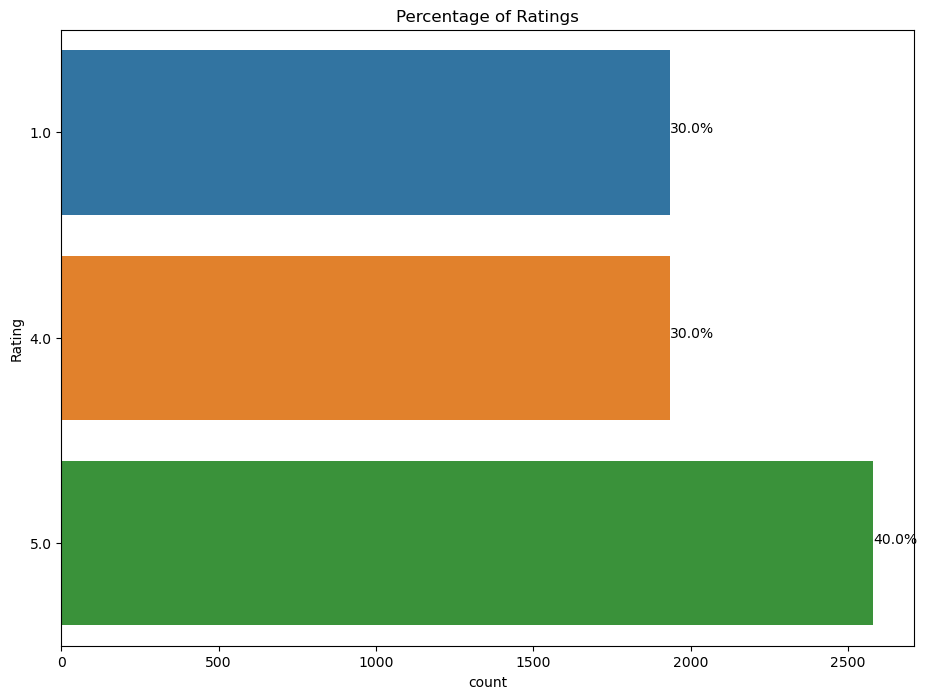

In [16]:
plt.figure(figsize=(11,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

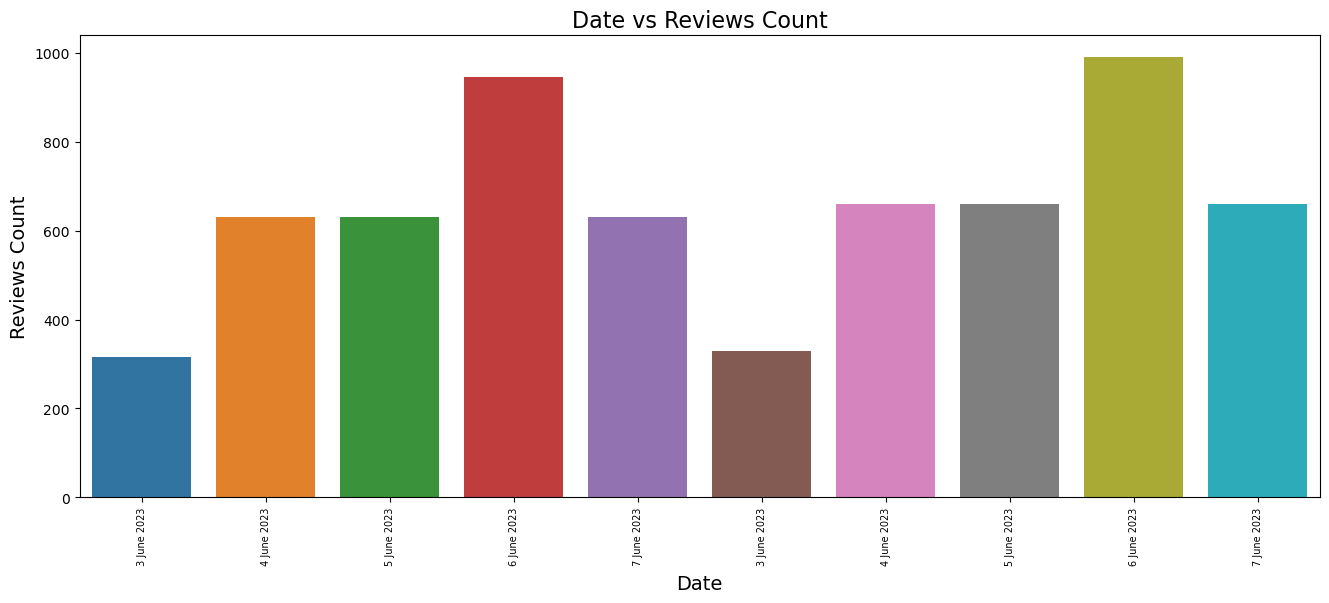

In [17]:
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

## BasicText Preprocessing

In [18]:
reviews=[Review.strip() for Review in reviews.Review]
reviews=[Review for Review in reviews if Review]
reviews[0:10]

['Good',
 'This is a multipurpose bag with three big segments and one front pocket .Perfect for office use /school and for small tours also .',
 'Worth every penny!!!',
 'Worth it, Go for it. Even my friend also purchased the same it’s very good quality so go for it',
 'The media could not be loaded.\n                \n\n\n\n\xa0Very bad quality',
 'Loved it',
 'It was ok',
 'Bag materaial got torned in a monthI dont think so product is orignal',
 'Good quality',
 'Very low quality']

In [19]:
reviews_text=' '.join(reviews)
reviews_text

'Good This is a multipurpose bag with three big segments and one front pocket .Perfect for office use /school and for small tours also . Worth every penny!!! Worth it, Go for it. Even my friend also purchased the same it’s very good quality so go for it The media could not be loaded.\n                \n\n\n\n\xa0Very bad quality Loved it It was ok Bag materaial got torned in a monthI dont think so product is orignal Good quality Very low quality Good This is a multipurpose bag with three big segments and one front pocket .Perfect for office use /school and for small tours also . Worth every penny!!! Worth it, Go for it. Even my friend also purchased the same it’s very good quality so go for it The media could not be loaded.\n                \n\n\n\n\xa0Very bad quality Loved it It was ok Bag materaial got torned in a monthI dont think so product is orignal Good quality Very low quality Good This is a multipurpose bag with three big segments and one front pocket .Perfect for office use 

In [20]:
# Remove Punctuations 
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Good This is a multipurpose bag with three big segments and one front pocket Perfect for office use school and for small tours also  Worth every penny Worth it Go for it Even my friend also purchased the same it’s very good quality so go for it The media could not be loaded\n                \n\n\n\n\xa0Very bad quality Loved it It was ok Bag materaial got torned in a monthI dont think so product is orignal Good quality Very low quality Good This is a multipurpose bag with three big segments and one front pocket Perfect for office use school and for small tours also  Worth every penny Worth it Go for it Even my friend also purchased the same it’s very good quality so go for it The media could not be loaded\n                \n\n\n\n\xa0Very bad quality Loved it It was ok Bag materaial got torned in a monthI dont think so product is orignal Good quality Very low quality Good This is a multipurpose bag with three big segments and one front pocket Perfect for office use school and for smal

In [21]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])
len(text_tokens)

['Good', 'This', 'is', 'a', 'multipurpose', 'bag', 'with', 'three', 'big', 'segments', 'and', 'one', 'front', 'pocket', 'Perfect', 'for', 'office', 'use', 'school', 'and', 'for', 'small', 'tours', 'also', 'Worth', 'every', 'penny', 'Worth', 'it', 'Go', 'for', 'it', 'Even', 'my', 'friend', 'also', 'purchased', 'the', 'same', 'it', '’', 's', 'very', 'good', 'quality', 'so', 'go', 'for', 'it', 'The']


52245

In [23]:
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Good', 'This', 'multipurpose', 'bag', 'three', 'big', 'segments', 'one', 'front', 'pocket', 'Perfect', 'office', 'use', 'school', 'small', 'tours', 'also', 'Worth', 'every', 'penny', 'Worth', 'Go', 'Even', 'friend', 'also', 'purchased', '’', 'good', 'quality', 'go', 'media', 'could', 'loaded', 'Very', 'bad', 'quality', 'Loved', 'ok', 'Bag', 'materaial', 'got', 'torned', 'monthI', 'dont', 'think', 'product', 'orignal', 'Good', 'quality', 'Very', 'low', 'quality', 'Good', 'This', 'multipurpose', 'bag', 'three', 'big', 'segments', 'one', 'front', 'pocket', 'Perfect', 'office', 'use', 'school', 'small', 'tours', 'also', 'Worth', 'every', 'penny', 'Worth', 'Go', 'Even', 'friend', 'also', 'purchased', '’', 'good', 'quality', 'go', 'media', 'could', 'loaded', 'Very', 'bad', 'quality', 'Loved', 'ok', 'Bag', 'materaial', 'got', 'torned', 'monthI', 'dont', 'think', 'product', 'orignal', 'Good', 'quality', 'Very', 'low', 'quality', 'Good', 'This', 'multipurpose', 'bag', 'three', 'big', 'segment

In [24]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['good', 'this', 'multipurpose', 'bag', 'three', 'big', 'segments', 'one', 'front', 'pocket', 'perfect', 'office', 'use', 'school', 'small', 'tours', 'also', 'worth', 'every', 'penny', 'worth', 'go', 'even', 'friend', 'also', 'purchased', '’', 'good', 'quality', 'go', 'media', 'could', 'loaded', 'very', 'bad', 'quality', 'loved', 'ok', 'bag', 'materaial', 'got', 'torned', 'monthi', 'dont', 'think', 'product', 'orignal', 'good', 'quality', 'very', 'low', 'quality', 'good', 'this', 'multipurpose', 'bag', 'three', 'big', 'segments', 'one', 'front', 'pocket', 'perfect', 'office', 'use', 'school', 'small', 'tours', 'also', 'worth', 'every', 'penny', 'worth', 'go', 'even', 'friend', 'also', 'purchased', '’', 'good', 'quality', 'go', 'media', 'could', 'loaded', 'very', 'bad', 'quality', 'loved', 'ok', 'bag', 'materaial', 'got', 'torned', 'monthi', 'dont', 'think', 'product', 'orignal', 'good', 'quality', 'very', 'low', 'quality', 'good', 'this', 'multipurpose', 'bag', 'three', 'big', 'segment

In [25]:
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['good', 'thi', 'multipurpos', 'bag', 'three', 'big', 'segment', 'one', 'front', 'pocket', 'perfect', 'offic', 'use', 'school', 'small', 'tour', 'also', 'worth', 'everi', 'penni', 'worth', 'go', 'even', 'friend', 'also', 'purchas', '’', 'good', 'qualiti', 'go', 'media', 'could', 'load', 'veri', 'bad', 'qualiti', 'love', 'ok', 'bag', 'materai', 'got', 'torn', 'monthi', 'dont', 'think', 'product', 'orign', 'good', 'qualiti', 'veri', 'low', 'qualiti', 'good', 'thi', 'multipurpos', 'bag', 'three', 'big', 'segment', 'one', 'front', 'pocket', 'perfect', 'offic', 'use', 'school', 'small', 'tour', 'also', 'worth', 'everi', 'penni', 'worth', 'go', 'even', 'friend', 'also', 'purchas', '’', 'good', 'qualiti', 'go', 'media', 'could', 'load', 'veri', 'bad', 'qualiti', 'love', 'ok', 'bag', 'materai', 'got', 'torn', 'monthi', 'dont', 'think', 'product', 'orign', 'good', 'qualiti', 'veri', 'low', 'qualiti', 'good', 'thi', 'multipurpos', 'bag', 'three', 'big', 'segment', 'one', 'front', 'pocket', 'perf

In [26]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

good this multipurpose bag three big segments one front pocket perfect office use school small tours also worth every penny worth go even friend also purchased ’ good quality go media could loaded very bad quality loved ok bag materaial got torned monthi dont think product orignal good quality very low quality good this multipurpose bag three big segments one front pocket perfect office use school small tours also worth every penny worth go even friend also purchased ’ good quality go media could loaded very bad quality loved ok bag materaial got torned monthi dont think product orignal good quality very low quality good this multipurpose bag three big segments one front pocket perfect office use school small tours also worth every penny worth go even friend also purchased ’ good quality go media could loaded very bad quality loved ok bag materaial got torned monthi dont think product orignal good quality very low quality good this multipurpose bag three big segments one front pocket p

In [27]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['good', 'this', 'multipurpose', 'bag', 'three', 'big', 'segment', 'one', 'front', 'pocket', 'perfect', 'office', 'use', 'school', 'small', 'tour', 'also', 'worth', 'every', 'penny', 'worth', 'go', 'even', 'friend', 'also', 'purchase', "'", 'good', 'quality', 'go', 'medium', 'could', 'load', 'very', 'bad', 'quality', 'love', 'ok', 'bag', 'materaial', 'got', 'torne', 'monthi', 'do', 'not', 'think', 'product', 'orignal', 'good', 'quality', 'very', 'low', 'quality', 'good', 'this', 'multipurpose', 'bag', 'three', 'big', 'segment', 'one', 'front', 'pocket', 'perfect', 'office', 'use', 'school', 'small', 'tour', 'also', 'worth', 'every', 'penny', 'worth', 'go', 'even', 'friend', 'also', 'purchase', "'", 'good', 'quality', 'go', 'medium', 'could', 'load', 'very', 'bad', 'quality', 'love', 'ok', 'bag', 'materaial', 'got', 'torne', 'monthi', 'do', 'not', 'think', 'product', 'orignal', 'good', 'quality', 'very', 'low', 'quality', 'good', 'this', 'multipurpose', 'bag', 'three', 'big', 'segment',

In [28]:
clean_reviews=' '.join(lemmas)

## Feature Extaction

### CountVectorizer

In [29]:
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [30]:
print(cv.vocabulary_)

{'good': 11, 'this': 35, 'multipurpose': 19, 'bag': 2, 'three': 36, 'big': 3, 'segment': 32, 'one': 23, 'front': 9, 'pocket': 27, 'perfect': 26, 'office': 21, 'use': 39, 'school': 31, 'small': 33, 'tour': 38, 'also': 0, 'worth': 41, 'every': 7, 'penny': 25, 'go': 10, 'even': 6, 'friend': 8, 'purchase': 29, 'quality': 30, 'medium': 17, 'could': 4, 'load': 13, 'very': 40, 'bad': 1, 'love': 14, 'ok': 22, 'materaial': 16, 'got': 12, 'torne': 37, 'monthi': 18, 'do': 5, 'not': 20, 'think': 34, 'product': 28, 'orignal': 24, 'low': 15}


In [31]:
print(reviewscv.toarray())
print(reviewscv.toarray().shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(34185, 42)


## CountVectorizer with N-grams (Bigrams & Bigrams)

In [32]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [33]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['also', 'bad', 'bag', 'big', 'could', 'do', 'even', 'every', 'friend', 'front', 'go', 'good', 'got', 'load', 'love', 'low', 'materaial', 'medium', 'monthi', 'multipurpose', 'not', 'office', 'ok', 'one', 'orignal', 'penny', 'perfect', 'pocket', 'product', 'purchase', 'quality', 'school', 'segment', 'small', 'think', 'this', 'three', 'torne', 'tour', 'use', 'very', 'worth']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## TF-IDF Vectorizer

In [34]:
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,2),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [35]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['also', 'bad', 'bag', 'big', 'could', 'do', 'even', 'every', 'friend', 'front', 'go', 'good', 'got', 'load', 'love', 'low', 'materaial', 'medium', 'monthi', 'multipurpose', 'not', 'office', 'ok', 'one', 'orignal', 'penny', 'perfect', 'pocket', 'product', 'purchase', 'quality', 'school', 'segment', 'small', 'think', 'this', 'three', 'torne', 'tour', 'use', 'very', 'worth']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


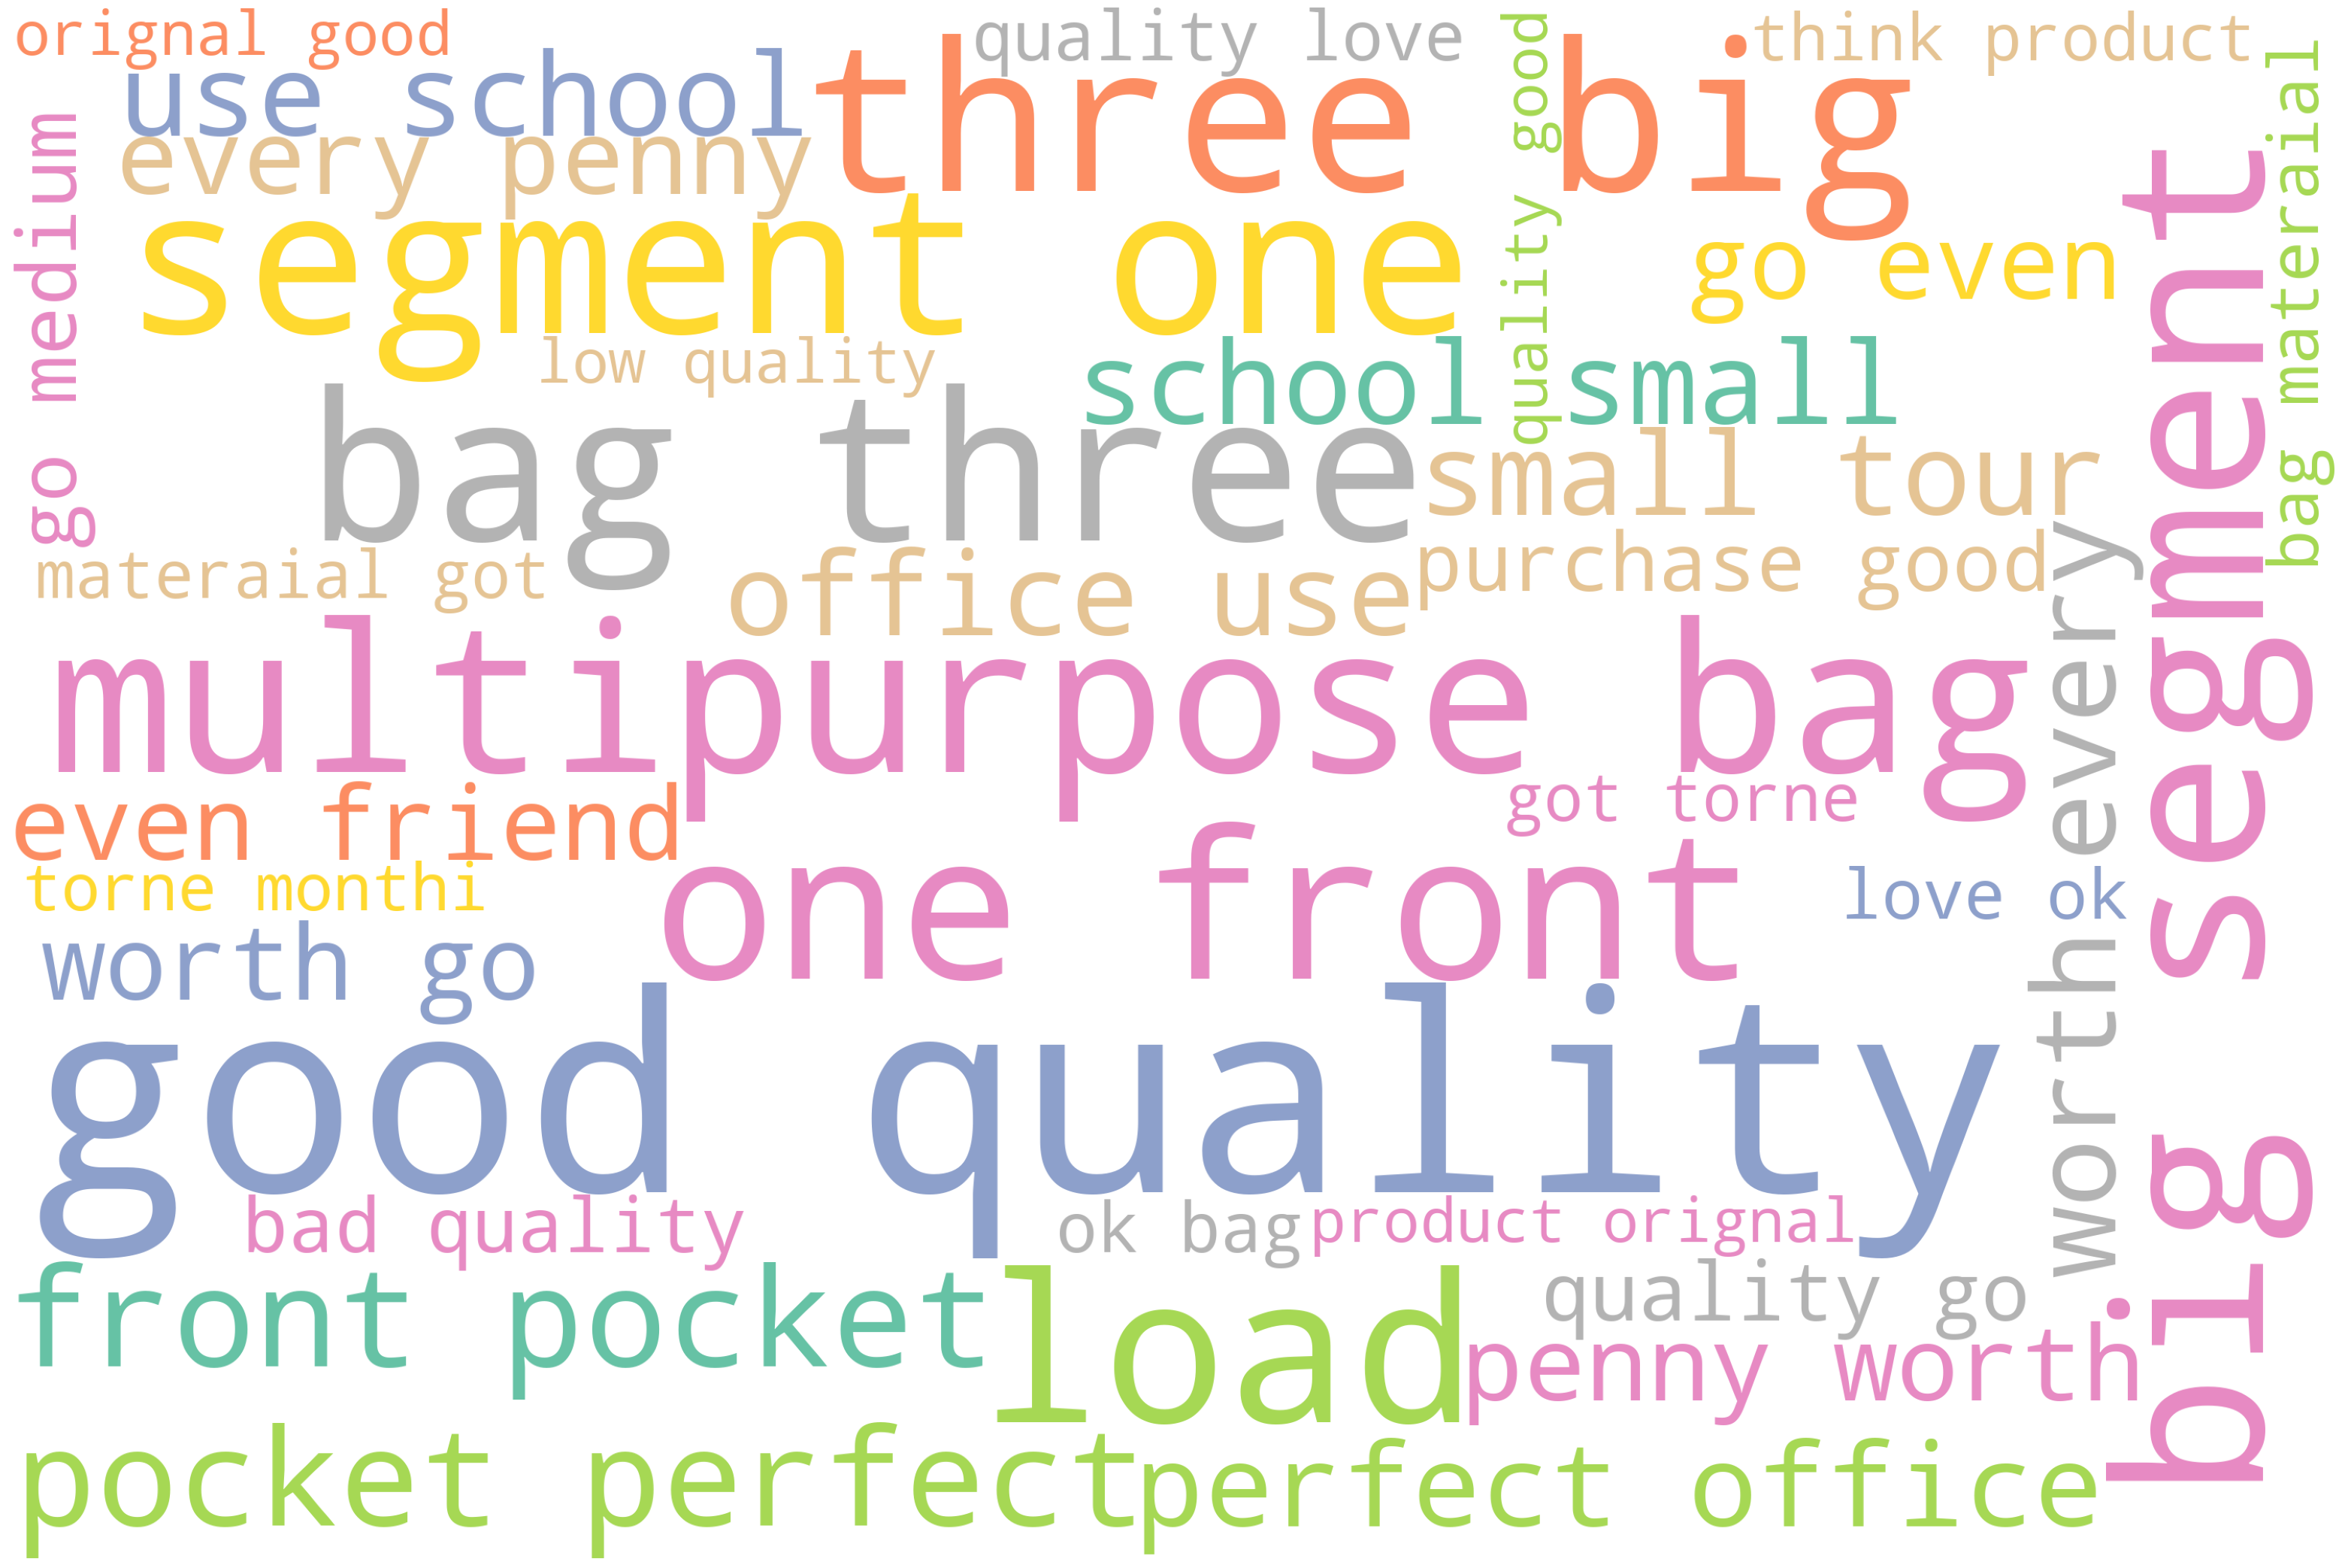

In [36]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

## Named Entity Recognition (NER)

In [37]:
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [38]:
for token in doc_block[100:200]:
    print(token,token.pos_)

orignal ADJ
good ADJ
quality NOUN
very ADV
low ADJ
quality NOUN
good ADJ
this DET
multipurpose ADJ
bag NOUN
three NUM
big ADJ
segment NOUN
one NUM
front ADJ
pocket NOUN
perfect ADJ
office NOUN
use NOUN
school NOUN
small ADJ
tour NOUN
also ADV
worth ADJ
every DET
penny NOUN
worth ADJ
go VERB
even ADV
friend NOUN
also ADV
purchase VERB
' PUNCT
good ADJ
quality NOUN
go VERB
medium NOUN
could AUX
load VERB
very ADV
bad ADJ
quality NOUN
love NOUN
ok ADP
bag NOUN
materaial NOUN
got VERB
torne NOUN
monthi NOUN
do AUX
not PART
think VERB
product NOUN
orignal ADJ
good ADJ
quality NOUN
very ADV
low ADJ
quality NOUN
good ADJ
this DET
multipurpose ADJ
bag NOUN
three NUM
big ADJ
segment NOUN
one NUM
front ADJ
pocket NOUN
perfect ADJ
office NOUN
use NOUN
school NOUN
small ADJ
tour NOUN
also ADV
worth ADJ
every DET
penny NOUN
worth ADJ
go VERB
even ADV
friend NOUN
also ADV
purchase VERB
' PUNCT
good ADJ
quality NOUN
go VERB
medium NOUN
could AUX
load VERB
very ADV
bad ADJ
quality NOUN
love NOUN
ok AD

In [39]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['think', 'product', 'quality', 'quality', 'bag', 'segment', 'pocket', 'office', 'use', 'school', 'tour', 'penny', 'go', 'friend', 'purchase', 'quality', 'go', 'medium', 'load', 'quality', 'love', 'bag', 'materaial', 'got', 'torne', 'monthi', 'think', 'product', 'quality', 'quality', 'bag', 'segment', 'pocket', 'office', 'use', 'school', 'tour', 'penny', 'go', 'friend', 'purchase', 'quality', 'go', 'medium', 'load', 'quality', 'love', 'bag', 'materaial', 'got', 'torne', 'monthi', 'think', 'product', 'quality', 'quality', 'bag', 'segment', 'pocket', 'office', 'use', 'school', 'tour', 'penny', 'go', 'friend', 'purchase', 'quality', 'go', 'medium', 'load', 'quality', 'love', 'bag', 'materaial', 'got', 'torne', 'monthi', 'think', 'product', 'quality', 'quality', 'bag', 'segment', 'pocket', 'office', 'use', 'school', 'tour', 'penny', 'go', 'friend', 'purchase', 'quality', 'go', 'medium', 'load', 'quality', 'love', 'bag']


In [40]:
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

word  count
0  quality   2580
1      bag   1290
2       go   1290
3  segment    645
4   pocket    645
5   office    645
6      use    645
7   school    645
8     tour    645
9    penny    645

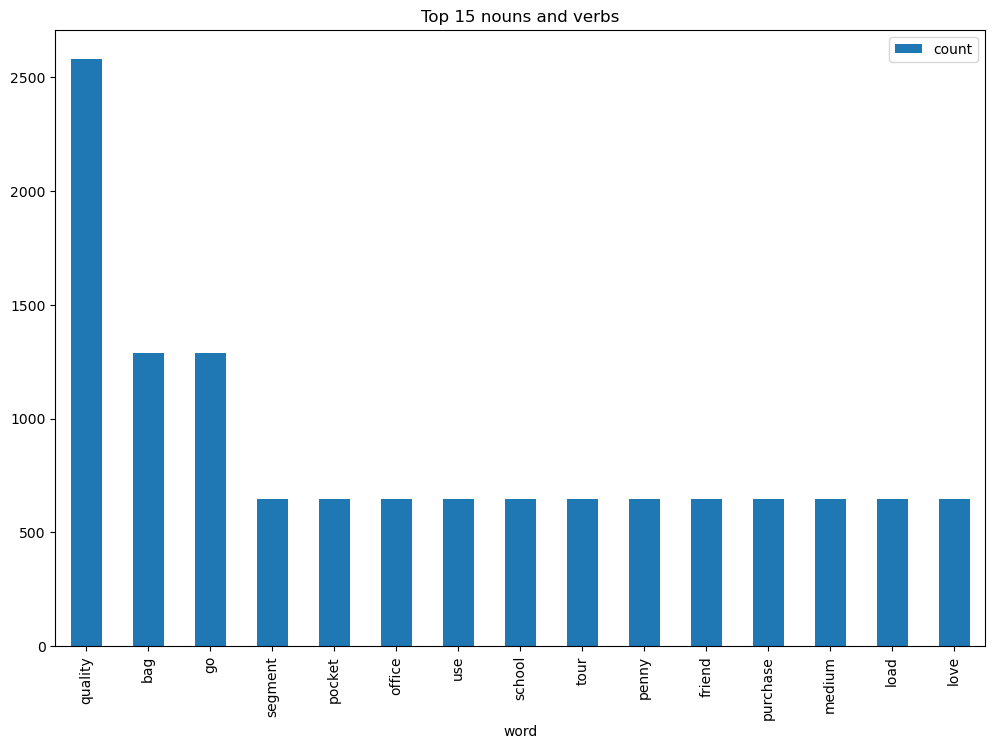

In [41]:
wd_df[0:15].plot.bar(x='word',figsize=(12,8),title='Top 15 nouns and verbs');

## Emotion Mining

In [42]:
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['Good This is a multipurpose bag with three big segments and one front pocket .Perfect for office use /school and for small tours also .',
 'Worth every penny!!!',
 'Worth it, Go for it.',
 'Even my friend also purchased the same it’s very good quality so go for it The media could not be loaded.',
 'Very bad quality Loved it It was ok Bag materaial got torned in a monthI dont think so product is orignal Good quality Very low quality Good This is a multipurpose bag with three big segments and one front pocket .Perfect for office use /school and for small tours also .',
 'Worth every penny!!!',
 'Worth it, Go for it.',
 'Even my friend also purchased the same it’s very good quality so go for it The media could not be loaded.',
 'Very bad quality Loved it It was ok Bag materaial got torned in a monthI dont think so product is orignal Good quality Very low quality Good This is a multipurpose bag with three big segments and one front pocket .Perfect for office use /school and for small tou

In [43]:
final=pd.DataFrame(sentences,columns=['Review'])
final

Review
0     Good This is a multipurpose bag with three big...
1                                  Worth every penny!!!
2                                  Worth it, Go for it.
3     Even my friend also purchased the same it’s ve...
4     Very bad quality Loved it It was ok Bag matera...
...                                                 ...
2576  Very bad quality Loved it It was ok Bag matera...
2577                               Worth every penny!!!
2578                               Worth it, Go for it.
2579  Even my friend also purchased the same it’s ve...
2580  Very bad quality Loved it It was ok Bag matera...

[2581 rows x 1 columns]

## vader_lexicon

In [44]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [45]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [46]:
sia = SentimentIntensityAnalyzer()

In [47]:
final.loc[10]['Review']

'Worth it, Go for it.'

In [48]:
sia.polarity_scores(final.loc[100]['Review'])

{'neg': 0.098, 'neu': 0.65, 'pos': 0.252, 'compound': 0.865}

In [49]:
final['scores'] = final['Review'].apply(lambda review: sia.polarity_scores('Review'))
final.head()

Review  \
0  Good This is a multipurpose bag with three big...   
1                               Worth every penny!!!   
2                               Worth it, Go for it.   
3  Even my friend also purchased the same it’s ve...   
4  Very bad quality Loved it It was ok Bag matera...   

                                              scores  
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...

In [50]:
final['compound']  = final['scores'].apply(lambda scores: scores['compound'])
final.head()

Review  \
0  Good This is a multipurpose bag with three big...   
1                               Worth every penny!!!   
2                               Worth it, Go for it.   
3  Even my friend also purchased the same it’s ve...   
4  Very bad quality Loved it It was ok Bag matera...   

                                              scores  compound  
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0  
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0  
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0  
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0  
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0

In [51]:
final['comp_score'] = final['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

In [52]:
final

Review  \
0     Good This is a multipurpose bag with three big...   
1                                  Worth every penny!!!   
2                                  Worth it, Go for it.   
3     Even my friend also purchased the same it’s ve...   
4     Very bad quality Loved it It was ok Bag matera...   
...                                                 ...   
2576  Very bad quality Loved it It was ok Bag matera...   
2577                               Worth every penny!!!   
2578                               Worth it, Go for it.   
2579  Even my friend also purchased the same it’s ve...   
2580  Very bad quality Loved it It was ok Bag matera...   

                                                 scores  compound comp_score  
0     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos  
1     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos  
2     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos  
3     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos  
4     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos  
...                                                 ...       ...        ...  
2576  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos  
2577  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos  
2578  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos  
2579  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos  
2580  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos  

[2581 rows x 4 columns]

## Sentimental Analysis

In [53]:
aa= final.copy()

In [54]:
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

aa['subjectivity'] = aa['Review'].apply(get_subjectivity)
aa['polarity'] = aa['Review'].apply(get_polarity)
aa

Review  \
0     Good This is a multipurpose bag with three big...   
1                                  Worth every penny!!!   
2                                  Worth it, Go for it.   
3     Even my friend also purchased the same it’s ve...   
4     Very bad quality Loved it It was ok Bag matera...   
...                                                 ...   
2576  Very bad quality Loved it It was ok Bag matera...   
2577                               Worth every penny!!!   
2578                               Worth it, Go for it.   
2579  Even my friend also purchased the same it’s ve...   
2580  Very bad quality Loved it It was ok Bag matera...   

                                                 scores  compound comp_score  \
0     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   
1     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   
2     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   
3     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   
4     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   
...                                                 ...       ...        ...   
2576  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   
2577  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   
2578  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   
2579  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   
2580  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   

      subjectivity  polarity  
0         0.366667  0.150000  
1         0.100000  0.585938  
2         0.100000  0.300000  
3         0.452500  0.455000  
4         0.532083  0.180000  
...            ...       ...  
2576      0.532083  0.180000  
2577      0.100000  0.585938  
2578      0.100000  0.300000  
2579      0.452500  0.455000  
2580      0.631333  0.198000  

[2581 rows x 6 columns]

In [55]:
def getanalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  elif score > 0:
      return 'Positive'

aa['Analysis'] = aa['polarity'].apply(getanalysis) 
aa

Review  \
0     Good This is a multipurpose bag with three big...   
1                                  Worth every penny!!!   
2                                  Worth it, Go for it.   
3     Even my friend also purchased the same it’s ve...   
4     Very bad quality Loved it It was ok Bag matera...   
...                                                 ...   
2576  Very bad quality Loved it It was ok Bag matera...   
2577                               Worth every penny!!!   
2578                               Worth it, Go for it.   
2579  Even my friend also purchased the same it’s ve...   
2580  Very bad quality Loved it It was ok Bag matera...   

                                                 scores  compound comp_score  \
0     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   
1     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   
2     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   
3     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   
4     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   
...                                                 ...       ...        ...   
2576  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   
2577  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   
2578  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   
2579  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   
2580  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   

      subjectivity  polarity  Analysis  
0         0.366667  0.150000  Positive  
1         0.100000  0.585938  Positive  
2         0.100000  0.300000  Positive  
3         0.452500  0.455000  Positive  
4         0.532083  0.180000  Positive  
...            ...       ...       ...  
2576      0.532083  0.180000  Positive  
2577      0.100000  0.585938  Positive  
2578      0.100000  0.300000  Positive  
2579      0.452500  0.455000  Positive  
2580      0.631333  0.198000  Positive  

[2581 rows x 7 columns]

In [56]:
positive = aa[aa['Analysis'] == 'Positive']
positive = positive.sort_values('polarity', ascending = False)
positive

Review  \
725                                Worth every penny!!!   
1669                               Worth every penny!!!   
769                                Worth every penny!!!   
1677                               Worth every penny!!!   
773                                Worth every penny!!!   
...                                                 ...   
2152  Very bad quality Loved it It was ok Bag matera...   
1284  Very bad quality Loved it It was ok Bag matera...   
1280  Very bad quality Loved it It was ok Bag matera...   
1276  Very bad quality Loved it It was ok Bag matera...   
0     Good This is a multipurpose bag with three big...   

                                                 scores  compound comp_score  \
725   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   
1669  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   
769   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   
1677  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   
773   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   
...                                                 ...       ...        ...   
2152  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   
1284  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   
1280  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   
1276  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   
0     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0        pos   

      subjectivity  polarity  Analysis  
725       0.100000  0.585938  Positive  
1669      0.100000  0.585938  Positive  
769       0.100000  0.585938  Positive  
1677      0.100000  0.585938  Positive  
773       0.100000  0.585938  Positive  
...            ...       ...       ...  
2152      0.532083  0.180000  Positive  
1284      0.532083  0.180000  Positive  
1280      0.532083  0.180000  Positive  
1276      0.532083  0.180000  Positive  
0         0.366667  0.150000  Positive  

[2581 rows x 7 columns]

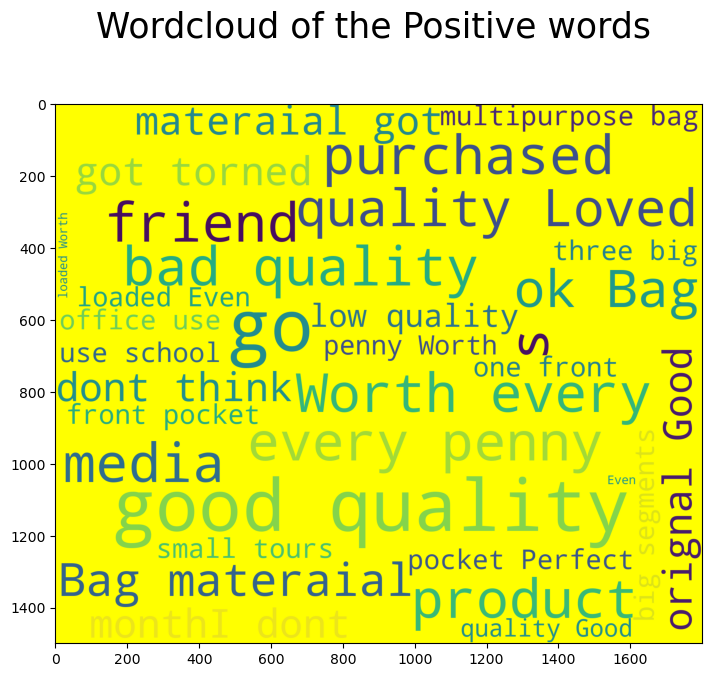

In [57]:
string_Total = " ".join(positive.Review)
fig = plt.figure(figsize = (15,7))
wordcloud_stw = WordCloud(
                background_color= 'yellow',
                width = 1800,
                height = 1500, random_state = 10, max_font_size = 200
                ).generate(string_Total)
plt.imshow(wordcloud_stw)
plt.title("Wordcloud of the Positive words ", y=1.11, fontsize=25)
plt.show()

In [58]:
negative = aa[aa['Analysis'] == 'Negative']
negative = negative.sort_values('polarity', ascending = False)
negative

Empty DataFrame
Columns: [Review, scores, compound, comp_score, subjectivity, polarity, Analysis]
Index: []

In [60]:
Neutral = aa[aa['Analysis'] == 'Neutral']
Neutral = Neutral.sort_values('polarity', ascending = False)
Neutral

Empty DataFrame
Columns: [Review, scores, compound, comp_score, subjectivity, polarity, Analysis]
Index: []

In [61]:
print("% of positive tweets:", round((positive.shape[0]/aa.shape[0])*100, 1))
print("% of negative tweets:", round((negative.shape[0]/aa.shape[0])*100, 1))
print("% of positive tweets:", round((Neutral.shape[0]/aa.shape[0])*100, 1)) 

% of positive tweets: 100.0
% of negative tweets: 0.0
% of positive tweets: 0.0


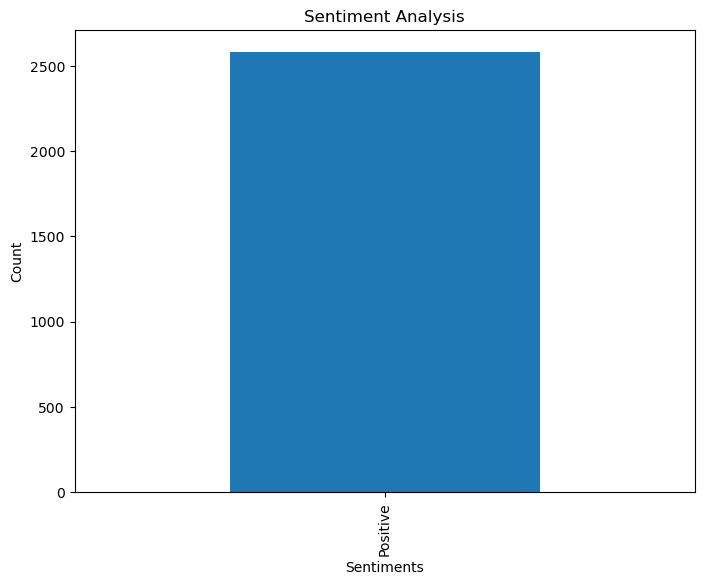

In [62]:
plt.figure(figsize=(8,6))
aa['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()

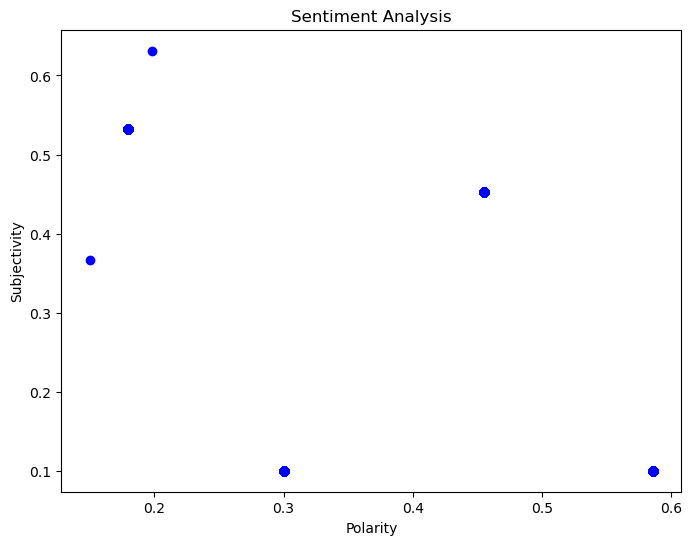

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(aa.polarity, aa.subjectivity, color = 'blue')

plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()